In [93]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime
from dateutil.relativedelta import relativedelta
#import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as smf
import pylab as pl

In [98]:
##import data
df = pd.read_csv("P://Python/cost_res_month.csv", parse_dates=[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 8 columns):
Time_Period        24 non-null datetime64[ns]
Month              24 non-null int64
MonthNum           24 non-null int64
Year               24 non-null int64
Reservations       24 non-null int64
Cost               24 non-null float64
Year_Times_Cost    24 non-null float64
Log_Cost           24 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(4)
memory usage: 1.6 KB


In [99]:
print df

   Time_Period  Month  MonthNum  Year  Reservations       Cost  \
0   2014-01-01      1         1     1           276   44038.24   
1   2014-02-01      2         2     1           143   23930.45   
2   2014-03-01      3         3     1           227   33261.70   
3   2014-04-01      4         4     1           334   44326.36   
4   2014-05-01      5         5     1           387   34999.67   
5   2014-06-01      6         6     1           195   51546.41   
6   2014-07-01      7         7     1           248   46004.16   
7   2014-08-01      8         8     1           270   45147.12   
8   2014-09-01      9         9     1           237   61914.14   
9   2014-10-01     10        10     1           277   77243.33   
10  2014-11-01     11        11     1           285   77458.52   
11  2014-12-01     12        12     1           230   55007.10   
12  2015-01-01      1        13     2           252   64742.11   
13  2015-02-01      2        14     2           154   45173.77   
14  2015-0

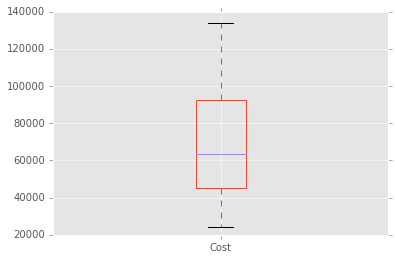

In [102]:
df[['Cost']].plot(kind = 'box')

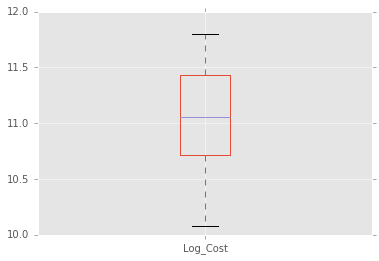

In [101]:
df[['Log_Cost']].plot(kind = 'box')

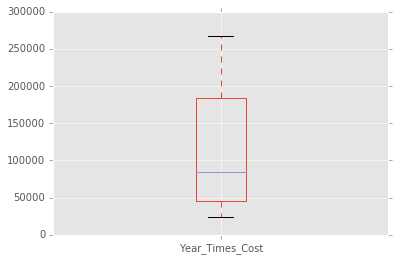

In [103]:
df[['Year_Times_Cost']].plot(kind = 'box')

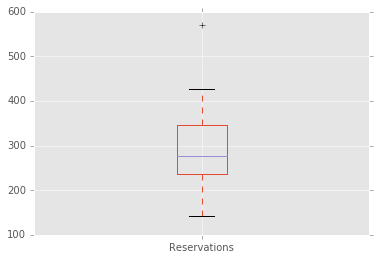

In [31]:
df[['Reservations']].plot(kind = 'box')

In [104]:
df.describe()

,Month,MonthNum,Year,Reservations,Cost,Year_Times_Cost,Log_Cost
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,6.500000,12.500000,1.500000,294.791667,68104.722083,111422.894167,11.044580
std,3.526299,7.071068,0.510754,98.635905,27823.749946,72591.051727,0.429309
min,1.000000,1.000000,1.000000,143.000000,23930.450000,23930.450000,10.082907
25%,3.750000,6.750000,1.000000,235.250000,45167.107500,45789.900000,10.718124
50%,6.500000,12.500000,1.500000,276.500000,63328.125000,83903.030000,11.055835
75%,9.250000,18.250000,2.000000,347.000000,92234.357500,184468.715000,11.432088
max,12.000000,24.000000,2.000000,571.000000,133865.800000,267731.600000,11.804593


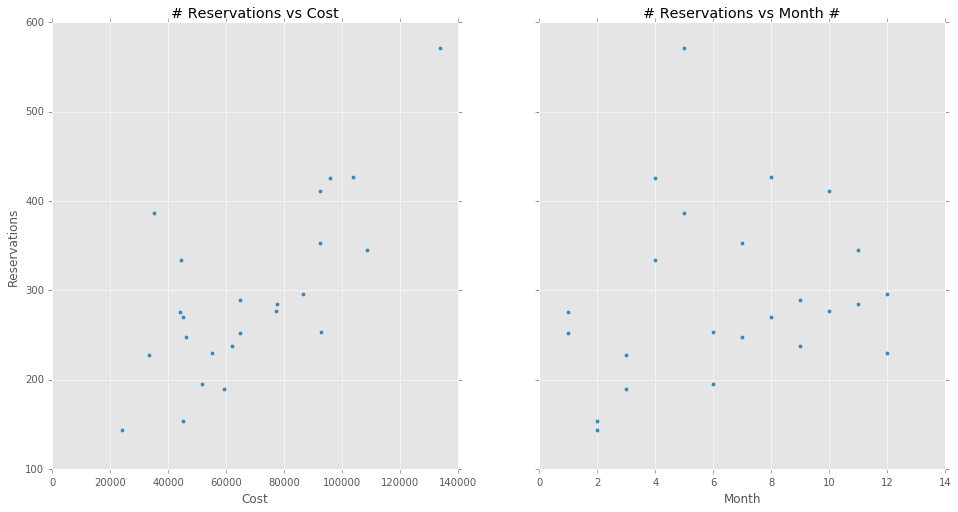

In [76]:
# Making the graphs a bit prettier
plt.style.use('ggplot')

# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 2, sharey=True)
df.plot(kind='scatter', x='Cost', y='Reservations', ax=axs[0], figsize=(16, 8), title = '# Reservations vs Cost')
df.plot(kind='scatter', x='Month', y='Reservations', ax=axs[1], title = '# Reservations vs Month #')

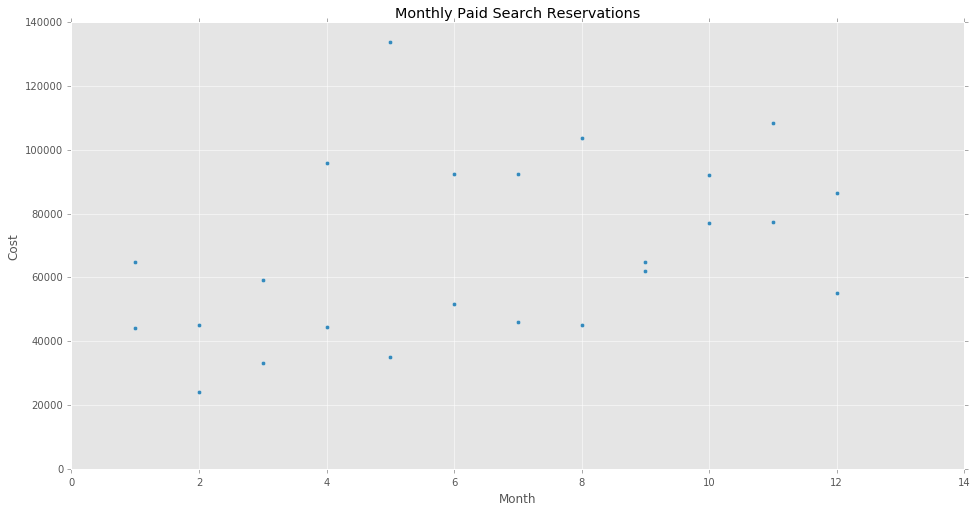

In [72]:
df.plot(kind='scatter', x='Month', y='Cost', figsize=(16, 8), title = 'Monthly Paid Search Reservations')

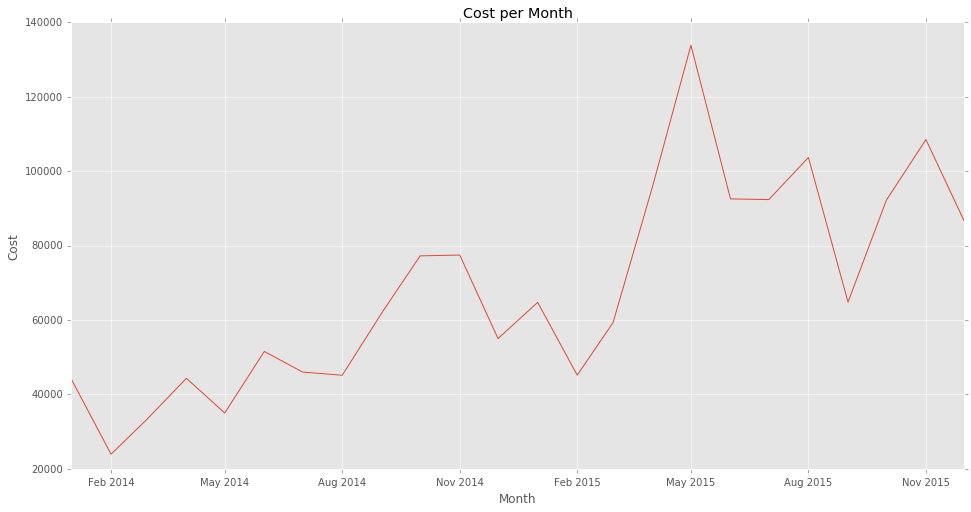

In [77]:
plt.figure(figsize=(16,8))
plt.xticks(fontsize = 10)
plt.plot(df['Time_Period'], df['Cost'])
plt.ylabel('Cost')
plt.xlabel('Month')
plt.title('Cost per Month')
plt.show()

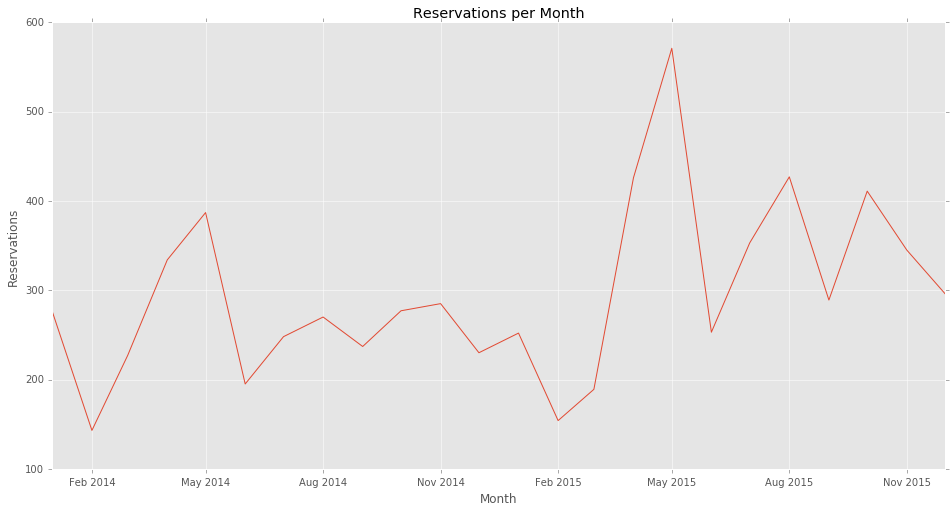

In [78]:
plt.figure(figsize=(16,8))
plt.xticks(fontsize = 10)
plt.plot(df['Time_Period'], df['Reservations'])
plt.ylabel('Reservations')
plt.xlabel('Month')
plt.title('Reservations per Month')
plt.show()

In [89]:
dummies = pd.get_dummies(df['Month'], prefix='month')
dummies

,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [105]:
data = df.join(dummies.ix[:,'month_2':])
print data

   Time_Period  Month  MonthNum  Year  Reservations       Cost  \
0   2014-01-01      1         1     1           276   44038.24   
1   2014-02-01      2         2     1           143   23930.45   
2   2014-03-01      3         3     1           227   33261.70   
3   2014-04-01      4         4     1           334   44326.36   
4   2014-05-01      5         5     1           387   34999.67   
5   2014-06-01      6         6     1           195   51546.41   
6   2014-07-01      7         7     1           248   46004.16   
7   2014-08-01      8         8     1           270   45147.12   
8   2014-09-01      9         9     1           237   61914.14   
9   2014-10-01     10        10     1           277   77243.33   
10  2014-11-01     11        11     1           285   77458.52   
11  2014-12-01     12        12     1           230   55007.10   
12  2015-01-01      1        13     2           252   64742.11   
13  2015-02-01      2        14     2           154   45173.77   
14  2015-0

In [112]:
df.corr()

,Month,MonthNum,Year,Reservations,Cost,Year_Times_Cost,Log_Cost
Month,1.000000,0.498694,0.000000,0.192441,0.402594,0.221735,0.469248
MonthNum,0.498694,1.000000,0.866778,0.416511,0.790493,0.864983,0.821684
Year,0.000000,0.866778,1.000000,0.369808,0.680361,0.870356,0.677997
Reservations,0.192441,0.416511,0.369808,1.000000,0.725972,0.674569,0.652372
Cost,0.402594,0.790493,0.680361,0.725972,1.000000,0.940278,0.974382
Year_Times_Cost,0.221735,0.864983,0.870356,0.674569,0.940278,1.000000,0.899331
Log_Cost,0.469248,0.821684,0.677997,0.652372,0.974382,0.899331,1.000000


In [116]:
data.corr()['Reservations']

Month              0.192441
MonthNum           0.416511
Year               0.369808
Reservations       1.000000
Cost               0.725972
Year_Times_Cost    0.674569
Log_Cost           0.652372
month_2           -0.456804
month_3           -0.271012
month_4            0.266068
month_5            0.575201
month_6           -0.221051
month_7            0.017825
month_8            0.167707
month_9           -0.099271
month_10           0.153656
month_11           0.063102
month_12          -0.099271
Name: Reservations, dtype: float64

In [106]:
lm = smf.ols(formula='Reservations ~ Cost + month_2 + month_3 + month_4 + month_5 + month_6 + month_7 + month_8 + month_9 + month_10 + month_11 + month_12', data=data).fit()

#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Reservations   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     13.38
Date:                Thu, 25 Aug 2016   Prob (F-statistic):           7.16e-05
Time:                        16:11:25   Log-Likelihood:                -110.78
No. Observations:                  24   AIC:                             247.6
Df Residuals:                      11   BIC:                             262.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    161.3997     31.329      5.152      0.000        92.446   230.353
Cost           0.0019      0.000      5.654      0.000         0.001     0.003
month_2      -78.0779     36.719     -2.126      0.057      -158.896     2.740
month_3      -40.6877     36.219     -1.123      0.285      -120.405    39.029
month_4       86.3277     36.497      2.365      0.037         5.999   166.656
month_5      158.3284     37.482      4.224      0.001        75.830   240.826
month_6      -73.3137     36.595     -2.003      0.070      -153.858     7.231
month_7        8.5843     36.453      0.235      0.818       -71.649    88.818
month_8       46.7216     36.730      1.272      0.230       -34.121   127.564
month_9      -17.9136     36.241     -0.494      0.631       -97.680    61.853
month_10      22.7947     37.508      0.608      0.556       -59.759   105.348
month_11     -21.8024     38.344     -0.569      0.581      -106.196    62.592
month_12     -31.9108     36.529     -0.874      0.401      -112.310    48.489
==============================================================================
Omnibus:                        0.383   Durbin-Watson:                   1.036
Prob(Omnibus):                  0.826   Jarque-Bera (JB):                0.002
Skew:                          -0.000   Prob(JB):                        0.999
Kurtosis:                       3.046   Cond. No.                     9.21e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [107]:
lm = smf.ols(formula='Reservations ~ Log_Cost + month_2 + month_3 + month_4 + month_5 + month_6 + month_7 + month_8 + month_9 + month_10 + month_11 + month_12', data=data).fit()

#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Reservations   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     9.212
Date:                Thu, 25 Aug 2016   Prob (F-statistic):           0.000423
Time:                        16:11:52   Log-Likelihood:                -114.91
No. Observations:                  24   AIC:                             255.8
Df Residuals:                      11   BIC:                             271.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -1019.1388    292.537     -3.484      0.005     -1663.008  -375.270
Log_Cost     117.8761     26.729      4.410      0.001        59.046   176.706
month_2      -58.3418     44.822     -1.302      0.220      -156.995    40.312
month_3      -34.2682     43.190     -0.793      0.444      -129.328    60.792
month_4       92.4509     43.239      2.138      0.056        -2.717   187.619
month_5      185.7251     43.418      4.278      0.001        90.162   281.288
month_6      -70.3417     43.456     -1.619      0.134      -165.987    25.304
month_7       12.9778     43.238      0.300      0.770       -82.188   108.144
month_8       55.2765     43.416      1.273      0.229       -40.282   150.835
month_9      -21.1310     43.150     -0.490      0.634      -116.103    73.841
month_10      26.0528     44.617      0.584      0.571       -72.149   124.255
month_11     -12.7184     45.275     -0.281      0.784      -112.368    86.931
month_12     -31.2156     43.451     -0.718      0.487      -126.851    64.420
==============================================================================
Omnibus:                        0.011   Durbin-Watson:                   0.805
Prob(Omnibus):                  0.995   Jarque-Bera (JB):                0.204
Skew:                           0.000   Prob(JB):                        0.903
Kurtosis:                       2.549   Cond. No.                         374.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [119]:
lm = smf.ols(formula='Reservations ~ Cost + month_4 + month_5', data=data).fit()

#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Reservations   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     29.92
Date:                Thu, 25 Aug 2016   Prob (F-statistic):           1.36e-07
Time:                        16:50:30   Log-Likelihood:                -123.31
No. Observations:                  24   AIC:                             254.6
Df Residuals:                      20   BIC:                             259.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    119.5748     24.952      4.792      0.000        67.527   171.623
Cost           0.0022      0.000      6.498      0.000         0.002     0.003
month_4      103.5368     33.512      3.090      0.006        33.632   173.442
month_5      170.5131     34.065      5.006      0.000        99.455   241.571
==============================================================================
Omnibus:                        0.322   Durbin-Watson:                   1.558
Prob(Omnibus):                  0.851   Jarque-Bera (JB):                0.445
Skew:                           0.227   Prob(JB):                        0.801
Kurtosis:                       2.510   Cond. No.                     2.82e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [120]:
lm = smf.ols(formula='Reservations ~ Log_Cost + month_4 + month_5', data=data).fit()

#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Reservations   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     26.70
Date:                Thu, 25 Aug 2016   Prob (F-statistic):           3.40e-07
Time:                        17:00:49   Log-Likelihood:                -124.41
No. Observations:                  24   AIC:                             256.8
Df Residuals:                      20   BIC:                             261.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -1271.9953    254.236     -5.003      0.000     -1802.323  -741.668
Log_Cost     139.5851     23.026      6.062      0.000        91.553   187.617
month_4      104.6564     35.087      2.983      0.007        31.466   177.847
month_5      196.8761     35.144      5.602      0.000       123.567   270.186
==============================================================================
Omnibus:                        0.308   Durbin-Watson:                   1.401
Prob(Omnibus):                  0.857   Jarque-Bera (JB):                0.346
Skew:                           0.232   Prob(JB):                        0.841
Kurtosis:                       2.638   Cond. No.                         294.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""